In [1]:
import geopandas
import os
import missingno as msno

In [2]:
ruta = '/Users/macbookair/Documents/GitHub/Problem_set2_BDML
os.getcwd()

'/Users/macbookair/Documents/GitHub/Problem_set2_BDML/scripts'

El proposito de este cuaderno es agregar la variable área construida a la base de datos para mejorar nuestras predicciones

Aquí se puede encontrar el diccionario de los datos abiertos de Bogotá: https://www.ideca.gov.co/sites/default/files/RCAreaConstrResid.pdf

In [3]:
bog_hogares = geopandas.read_file('aconstruidaresidencial.gpkg')

In [4]:
bog_hogares.head()

,OBJECTID,MANCODIGO,AREA_RESID,ANO,SHAPE_AREA,SHAPE_LEN,geometry
0,16,001345032,407.11,2022-01-01,8.207135e-08,0.001191,"MULTIPOLYGON (((-74.09371 4.51030, -74.09371 4..."
1,17,004637053,1655.09,2022-01-01,1.382929e-07,0.001711,"MULTIPOLYGON (((-74.19504 4.62968, -74.19510 4..."
2,18,002611049,1615.20,2022-01-01,7.151772e-08,0.001114,"MULTIPOLYGON (((-74.10655 4.49872, -74.10665 4..."
3,19,002430016,5272.12,2022-01-01,2.070219e-07,0.002287,"MULTIPOLYGON (((-74.16554 4.57309, -74.16559 4..."
4,20,001355039,800.45,2022-01-01,4.379187e-08,0.000901,"MULTIPOLYGON (((-74.09661 4.55380, -74.09671 4..."


In [5]:
bog_hogares.shape

(74199, 7)

<Axes: >

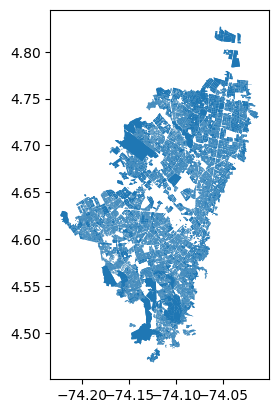

In [8]:
bog_hogares.plot(markersize = .5)

In [9]:
base_tratada = geopandas.read_file('base_datos_tratada.csv')

In [13]:
base_tratada.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 48930 entries, 0 to 48929
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   type_data                   48930 non-null  object  
 1   property_id                 48930 non-null  object  
 2   city                        48930 non-null  object  
 3   price                       48930 non-null  object  
 4   month                       48930 non-null  object  
 5   year                        48930 non-null  object  
 6   surface_total               48930 non-null  object  
 7   surface_covered             48930 non-null  object  
 8   rooms                       48930 non-null  object  
 9   bedrooms                    48930 non-null  object  
 10  bathrooms                   48930 non-null  object  
 11  property_type               48930 non-null  object  
 12  operation_type              48930 non-null  object  
 13  lat     

In [14]:
from shapely.geometry import Point
#Geometrias tipo punto

base_tratada['geometry'] = base_tratada.apply(lambda row: Point(row['lon'], row['lat']), axis = 1)
base_tratada = geopandas.GeoDataFrame(base_tratada, geometry = 'geometry')

In [15]:
base = geopandas.sjoin(base_tratada, bog_hogares, how = 'inner', op = 'within') #cambiar el orden a ver que pasa
#inner: conserva las observaciones de las dos bases que tengan coincidencia espacial
#within: encuentra puntos que se encuentran dentro de los poligonos de la base Bogota

/Users/macbookair/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/nq/qfr1b2_94wsgjv23mrk2bvvm0000gn/T/ipykernel_72278/2998349190.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  base = geopandas.sjoin(base_tratada, bog_hogares, how = 'inner', op = 'within')


In [19]:
print(base.shape)
print(bog_hogares.shape)
print(base_tratada.shape)

(60837, 66)
(74199, 7)
(48930, 59)


In [20]:
base.head()

,type_data,property_id,city,price,month,year,surface_total,surface_covered,rooms,bedrooms,...,distancia_ciclovia5,ditancia_servecios5,geometry,index_right,OBJECTID,MANCODIGO,AREA_RESID,ANO,SHAPE_AREA,SHAPE_LEN
2,1,957a84e8e93ae2b33bc6f61b,Bogotá D.C,400000000,10,2020,NA,NA,8,8,...,825953859256658300,1071128731337901.2,POINT (-74.13866 4.58662),15279,15932,002408043,5580.03,2022-01-01,3.259573e-07,0.002531
2,1,957a84e8e93ae2b33bc6f61b,Bogotá D.C,400000000,10,2020,NA,NA,8,8,...,825953859256658300,1071128731337901.2,POINT (-74.13866 4.58662),53495,54615,002408043,5580.00,2021-01-01,3.259573e-07,0.002531
3,1,eb32d75b32bc5e8677207fc7,Bogotá D.C,800000000,10,2020,NA,NA,6,6,...,7404450003103239,28528385220177.047,POINT (-74.14215 4.67815),24588,23529,006420094,6880.35,2022-01-01,2.577688e-07,0.002078
14986,1,c70f988cac0f162fcbd7a53b,Bogotá D.C,800000000,10,2020,NA,NA,6,6,...,7404450003103239,28528385220177.047,POINT (-74.14215 4.67815),24588,23529,006420094,6880.35,2022-01-01,2.577688e-07,0.002078
3,1,eb32d75b32bc5e8677207fc7,Bogotá D.C,800000000,10,2020,NA,NA,6,6,...,7404450003103239,28528385220177.047,POINT (-74.14215 4.67815),62712,62430,006420094,6880.00,2021-01-01,2.577687e-07,0.002078


In [21]:
base.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 60837 entries, 2 to 48925
Data columns (total 66 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   type_data                   60837 non-null  object  
 1   property_id                 60837 non-null  object  
 2   city                        60837 non-null  object  
 3   price                       60837 non-null  object  
 4   month                       60837 non-null  object  
 5   year                        60837 non-null  object  
 6   surface_total               60837 non-null  object  
 7   surface_covered             60837 non-null  object  
 8   rooms                       60837 non-null  object  
 9   bedrooms                    60837 non-null  object  
 10  bathrooms                   60837 non-null  object  
 11  property_type               60837 non-null  object  
 12  operation_type              60837 non-null  object  
 13  lat          

In [34]:
na_shape = base['SHAPE_AREA'].isnull().sum()
print(na_shape)
na_surfacec = base['surface_covered'].isnull().sum()
print(na_surfacec)
#No hay missing values

0
0


In [32]:
import pandas as pd
df = pd.DataFrame(base.drop(columns = 'geometry'))
#Convertimos a dataframe a ver si se ven missings

<Axes: >

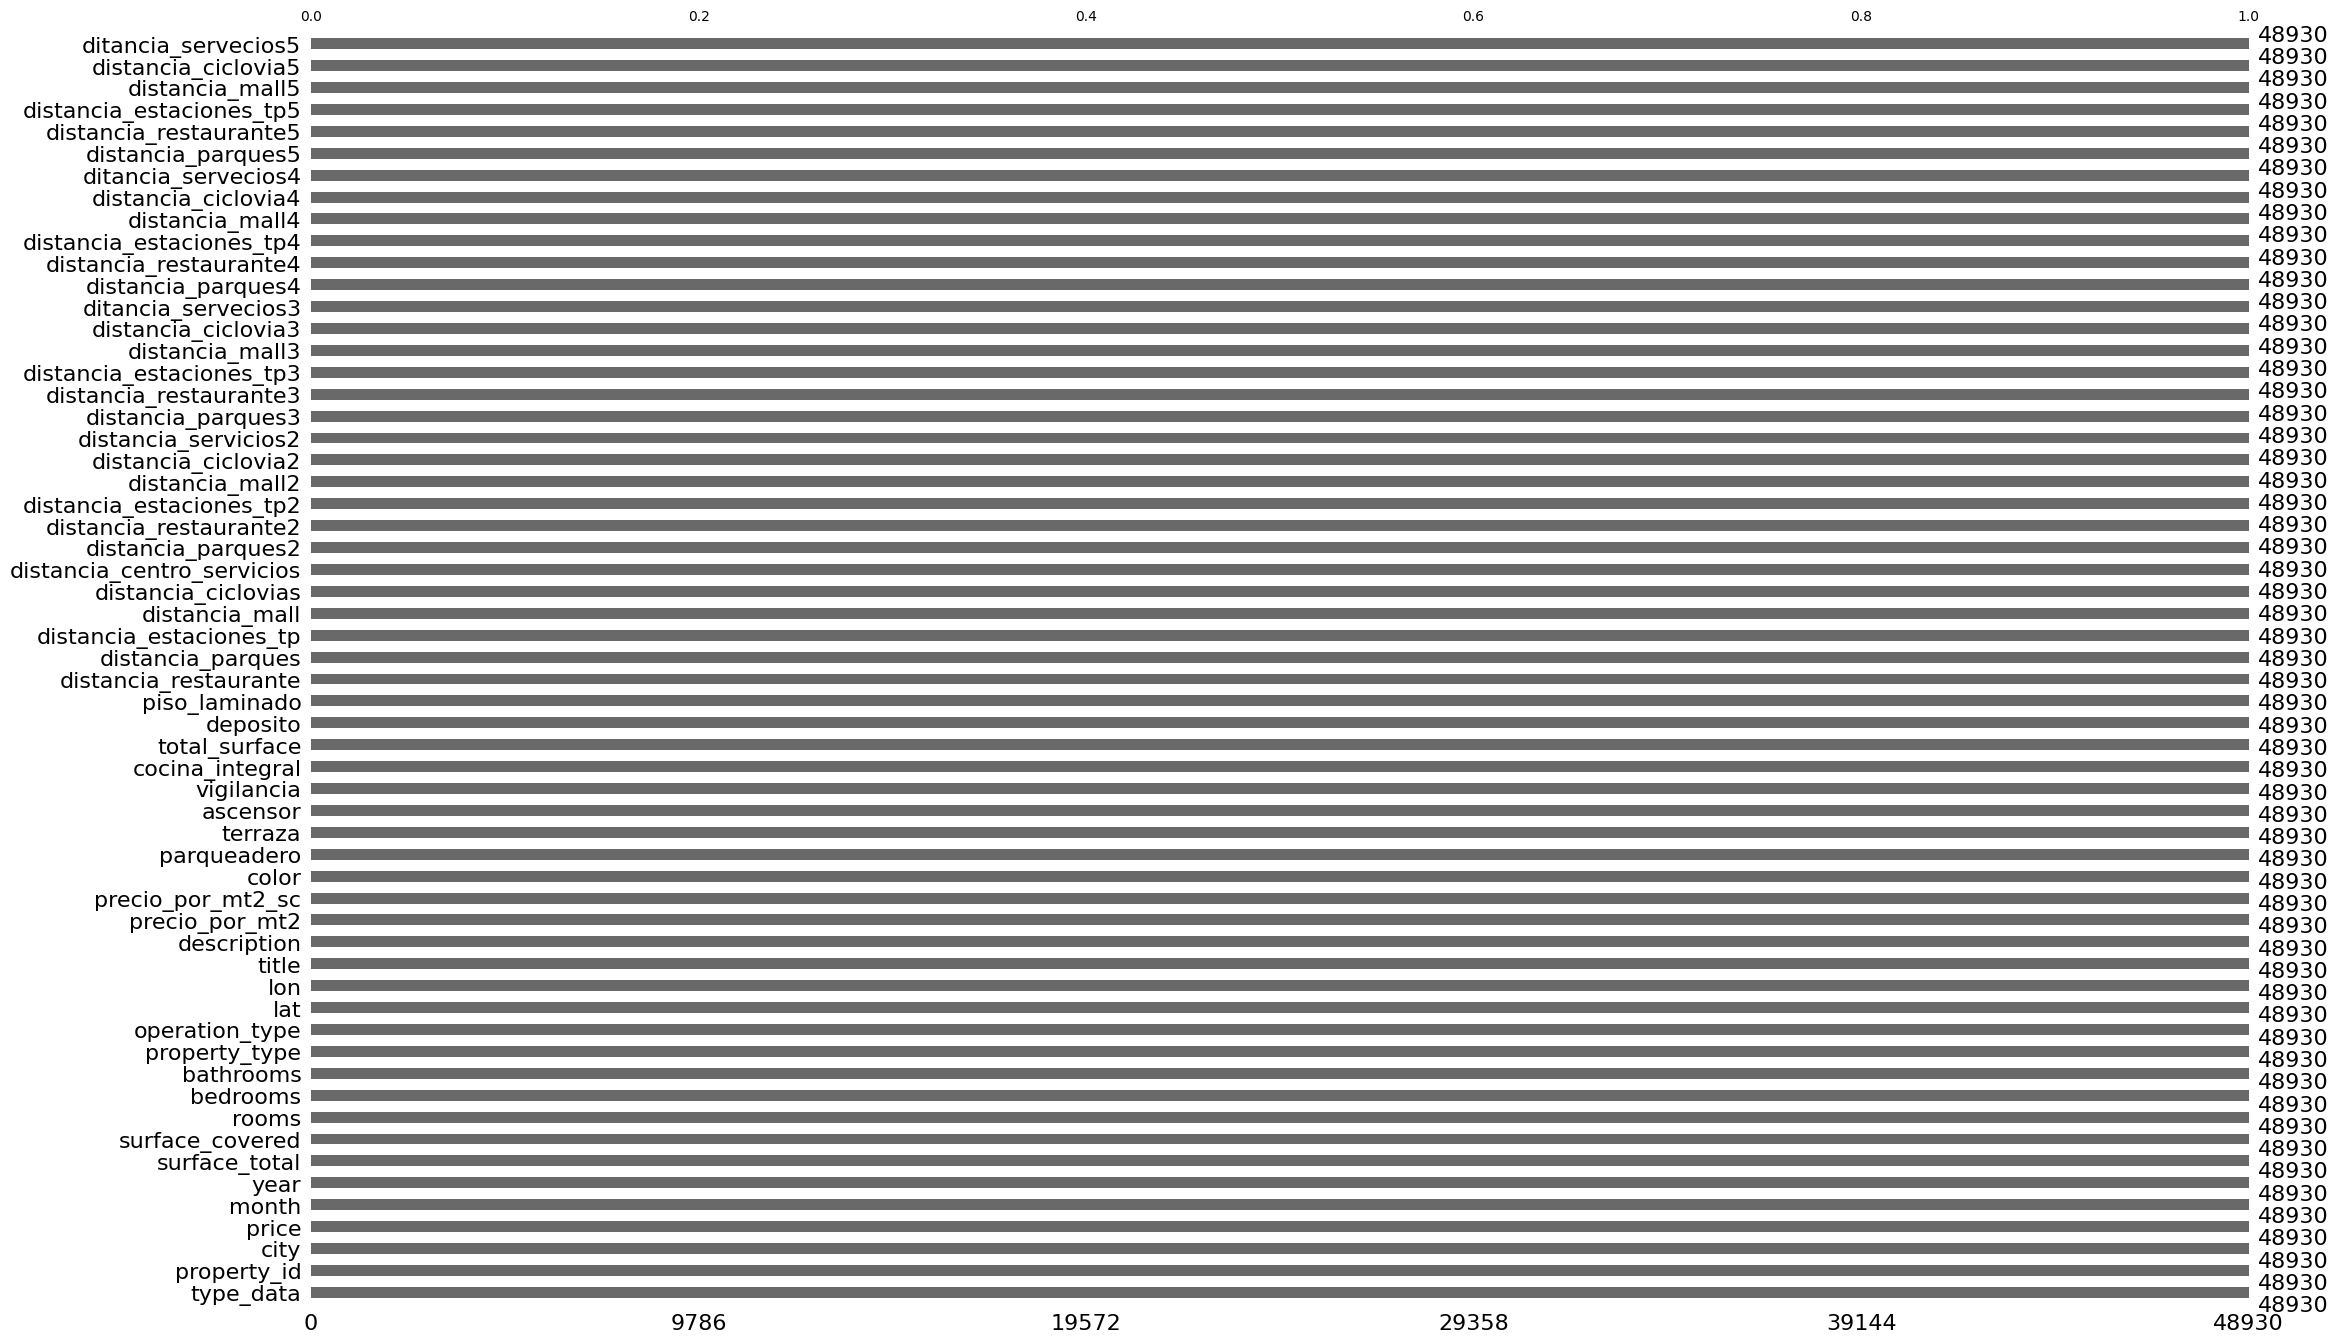

In [35]:
de = pd.DataFrame(base_tratada.drop(columns = 'geometry'))
msno.bar(de)

In [36]:
geopandas.to_file('base_area.csv')

AttributeError: module 'geopandas' has no attribute 'to_file'